DataFrames là một từ thông dụng trong ngành công nghiệp ngày nay. Mọi người có xu hướng sử dụng nó với các ngôn ngữ phổ biến được sử dụng cho Phân tích dữ liệu như Python, Scala và R.

DataFrames thường đề cập đến một cấu trúc dữ liệu, về bản chất là dạng bảng. Nó đại diện cho các hàng, mỗi hàng bao gồm một số quan sát. Các hàng có thể có nhiều định dạng dữ liệu (không đồng nhất), trong khi một cột có thể có dữ liệu cùng loại (đồng nhất). DataFrames thường chứa một số siêu dữ liệu ngoài dữ liệu; ví dụ, tên cột và hàng.

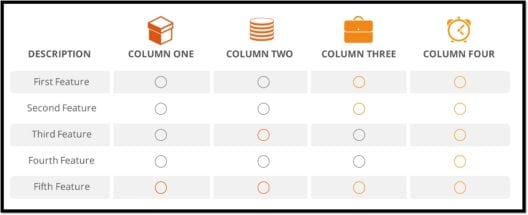

Chúng ta có thể nói rằng DataFrames là các cấu trúc dữ liệu 2 chiều, tương tự như bảng SQL hoặc bảng tính.

Ta cần DataFrame vì:

- Xử lý dữ liệu có cấu trúc và bán cấu trúc: DataFrames được thiết kế để xử lý một tập hợp lớn dữ liệu có cấu trúc cũng như bán cấu trúc . Các quan sát trong Spark DataFrame được tổ chức dưới các cột được đặt tên, giúp Apache Spark hiểu sơ đồ của Dataframe. Điều này giúp Spark tối ưu hóa kế hoạch thực hiện trên các truy vấn này. Nó cũng có thể xử lý petabyte dữ liệu.

- Cắt lát và thái hạt lựu: API DataFrames thường hỗ trợ các phương thức phức tạp để cắt và xử lý dữ liệu. Nó bao gồm các hoạt động như "chọn" các hàng, cột và ô theo tên hoặc theo số, lọc ra các hàng, v.v. Dữ liệu thống kê thường rất lộn xộn và chứa nhiều giá trị thiếu và không chính xác và vi phạm phạm vi. Vì vậy, một tính năng cực kỳ quan trọng của DataFrames là quản lý rõ ràng dữ liệu bị thiếu.

- Nguồn dữ liệu: DataFrames đã hỗ trợ cho một loạt các định dạng và nguồn dữ liệu, chúng ta sẽ xem xét vấn đề này sau trong hướng dẫn Pyspark DataFrames này. Họ có thể lấy dữ liệu từ nhiều nguồn khác nhau.

- Hỗ trợ nhiều ngôn ngữ: Nó có hỗ trợ API cho các ngôn ngữ khác nhau như Python, R, Scala, Java, giúp mọi người có nền tảng lập trình khác nhau dễ sử dụng hơn


Các tính năng của DataFrames


- DataFrames được phân phối trong tự nhiên, làm cho nó có cấu trúc dữ liệu có khả năng chịu lỗi và có tính sẵn sàng cao.
- Đánh giá lười biếng là một chiến lược đánh giá giữ đánh giá biểu thức cho đến khi cần giá trị của nó. Nó tránh đánh giá lặp đi lặp lại. Đánh giá lười biếng trong Spark có nghĩa là việc thực thi sẽ không bắt đầu cho đến khi một hành động được kích hoạt. Trong Spark, hình ảnh đánh giá lười biếng xuất hiện khi biến đổi Spark xảy ra.
- DataFrames là bất biến trong tự nhiên. Bằng cách bất biến, ý tôi là nó là một đối tượng có trạng thái không thể sửa đổi sau khi nó được tạo. Nhưng chúng ta có thể biến đổi các giá trị của nó bằng cách áp dụng một phép biến đổi nhất định, như trong RDD.

In [2]:
!pip install pyspark
from pyspark import *
from pyspark.sql import *

     |████████████████████████████████| 212.3MB 70kB/s 
     |████████████████████████████████| 204kB 37.0MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.1-py2.py3-none-any.whl size=212767604 sha256=4d1db65473546b829f9bbf418d7f3038844c2bd068d7d56eec7ee986404c1463
  Stored in directory: /root/.cache/pip/wheels/0b/90/c0/01de724414ef122bd05f056541fb6a0ecf47c7ca655f8b3c0f
Successfully built pyspark


In [5]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('ml-diabetes').getOrCreate()
df = spark.read.csv('diabetes.csv', header = True, inferSchema = True)
df.show()

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
|          5|    116|           74|            0|      0|25.6|                   0.201| 30|      0|
|          3|     78|           50|           32|     88|31.0|                   0.248| 26|      1|


In [6]:
df.printSchema()

root
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- BloodPressure: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: double (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Outcome: integer (nullable = true)



In [11]:
#In tên và đếm các columns
df.columns
df.count() 

print(df.columns)
print(len(df.columns))

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
9


In [12]:
#Mo ta mot cot
df.describe('Outcome').show()
df.describe('Age').show()

+-------+------------------+
|summary|           Outcome|
+-------+------------------+
|  count|               768|
|   mean|0.3489583333333333|
| stddev| 0.476951377242799|
|    min|                 0|
|    max|                 1|
+-------+------------------+

+-------+------------------+
|summary|               Age|
+-------+------------------+
|  count|               768|
|   mean|33.240885416666664|
| stddev|11.760231540678689|
|    min|                21|
|    max|                81|
+-------+------------------+



In [13]:
#Mo ta nhieu cot
df.select('Age','Outcome').show()

+---+-------+
|Age|Outcome|
+---+-------+
| 50|      1|
| 31|      0|
| 32|      1|
| 21|      0|
| 33|      1|
| 30|      0|
| 26|      1|
| 29|      0|
| 53|      1|
| 54|      1|
| 30|      0|
| 34|      1|
| 57|      0|
| 59|      1|
| 51|      1|
| 32|      1|
| 31|      1|
| 31|      1|
| 33|      0|
| 32|      1|
+---+-------+
only showing top 20 rows



In [14]:
#Lọc dữ liệu
df.filter(df.Age=='30').show()
 
df.filter(df.Age=='30').count()

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          5|    116|           74|            0|      0|25.6|                   0.201| 30|      0|
|          4|    110|           92|            0|      0|37.6|                   0.191| 30|      0|
|          5|     88|           66|           21|     23|24.4|                   0.342| 30|      0|
|          3|    120|           70|           30|    135|42.9|                   0.452| 30|      0|
|          3|    170|           64|           37|    225|34.5|                   0.356| 30|      1|
|          3|    111|           56|           39|      0|30.1|                   0.557| 30|      0|
|          0|    167|            0|            0|      0|32.3|                   0.839| 30|      1|


21

In [16]:
#Lọc dữ liệu nhiều tham số
df.filter((df.Age=='30') & (df.Outcome=='1')).show()

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          3|    170|           64|           37|    225|34.5|                   0.356| 30|      1|
|          0|    167|            0|            0|      0|32.3|                   0.839| 30|      1|
|          2|    124|           68|           28|    205|32.9|                   0.875| 30|      1|
|          1|    122|           64|           32|    156|35.1|                   0.692| 30|      1|
|          4|    117|           62|           12|      0|29.7|                    0.38| 30|      1|
|         10|    115|            0|            0|      0| 0.0|                   0.261| 30|      1|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+


In [18]:
#Sắp xếp dữ liệu
df.orderBy(df.Age).show()

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          1|    113|           64|           35|      0|33.6|                   0.543| 21|      1|
|          1|    139|           62|           41|    480|40.7|                   0.536| 21|      0|
|          0|    102|           52|            0|      0|25.1|                   0.078| 21|      0|
|          1|     73|           50|           10|      0|23.0|                   0.248| 21|      0|
|          2|    108|           62|           32|     56|25.2|                   0.128| 21|      0|
|          1|     80|           55|            0|      0|19.1|                   0.258| 21|      0|
|          1|     71|           78|           50|     45|33.2|                   0.422| 21|      0|
